In [1]:
from astropy.io import ascii
from astropy.table import Table,QTable
import numpy as np
import numpy.ma as ma
#import pandas as pd
#import corner
import matplotlib.pyplot as plt
#%matplotlib notebook
#import emcee
from astropy.io import fits
from astropy.table import Table, QTable

import sys
sys.path.insert(1, '/Users/richardzhang/Documents/UR_Stuff/Research_UR/RotationCurve/2D_RC/main/')
#sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/Yifan_Zhang/RotationCurve/2D_RC/main/')
from RC_2D_Fit_Functions import Galaxy_Data, getTidal
from Velocity_Map_Functions_cython import rot_incl_iso, rot_incl_NFW, rot_incl_bur

MANGA_FOLDER = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/SDSS/dr17/manga/spectro/'
#MANGDA_FOLDER = '/home/yzh250/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/spectro/'
#MANGA_FOLDER = '/Users/kellydouglass/Documents/Research/data/SDSS/dr16/manga/spectro/'

DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/drpall-v3_1_1.fits'

VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v3_1_1/3.1.0/HYB10-GAU-MILESHC/'

from Velocity_Map_Functions_cython import rot_incl_iso,\
                                          rot_incl_NFW, \
                                          rot_incl_bur           

from galaxy_component_functions_cython import vel_tot_iso,\
                                              vel_tot_NFW,\
                                              vel_tot_bur,\
                                              bulge_vel,\
                                              disk_vel,\
                                              halo_vel_iso,\
                                              halo_vel_NFW,\
                                              halo_vel_bur
from RC_2D_Fit_Functions import Galaxy_Data, \
                                Galaxy_Fitting_iso,\
                                Galaxy_Fitting_NFW, \
                                Galaxy_Fitting_bur, \
                                Hessian_Calculation_Isothermal,\
                                Hessian_Calculation_NFW,\
                                Hessian_Calculation_Burket,\
                                Plotting_Isothermal,\
                                Plotting_NFW,\
                                Plotting_Burkert,\
                                getTidal,\
                                deproject_spaxel,\
                                plot_rot_curve,\
                                plot_diagnostic_panel,\
                                run_MCMC

In [2]:
iso_data_range = Table.read('iso_data_range.csv',format='ascii.csv')
nfw_data_range = Table.read('nfw_data_range.csv',format='ascii.csv')
bur_data_range = Table.read('bur_data_range.csv',format='ascii.csv')

In [4]:
iso_data_rat = iso_data_range['r_max']/iso_data_range['r90']

0.7593608684523873
0.6438362077517789
0.7170601682490884
0.17085107263706525
0.837374345510644
1.5809175095606516
0.2935464520987169
0.7680727164877199
0.5581457715097686
0.5266250215478128
0.4796580343609709


In [5]:
nfw_data_rat = nfw_data_range['r_max']/nfw_data_range['r90']

In [6]:
bur_data_rat = bur_data_range['r_max']/bur_data_range['r90']

Text(0.5, 1.0, '$r_{max}/r_{90}$ Isothermal')

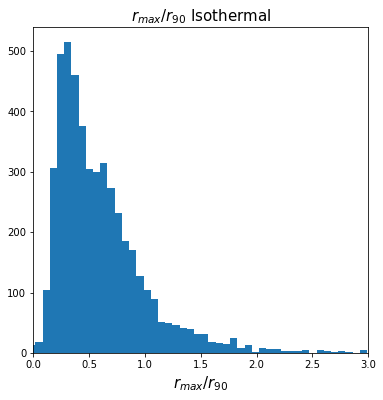

In [46]:
fig = plt.figure(figsize=(6,6))
plt.hist(iso_data_rat,bins=500)
plt.xlim(0,3)
plt.xlabel(r'$r_{max}/r_{90}$',fontsize=15)
plt.title(r'$r_{max}/r_{90}$ Isothermal',fontsize=15)

Text(0.5, 1.0, '$r_{max}/r_{90}$ NFW')

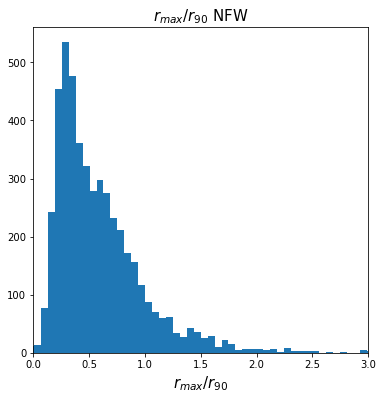

In [47]:
fig = plt.figure(figsize=(6,6))
plt.hist(nfw_data_rat,bins=500)
plt.xlim(0,3)
plt.xlabel(r'$r_{max}/r_{90}$',fontsize=15)
plt.title(r'$r_{max}/r_{90}$ NFW',fontsize=15)

Text(0.5, 1.0, '$r_{max}/r_{90}$ Burkert')

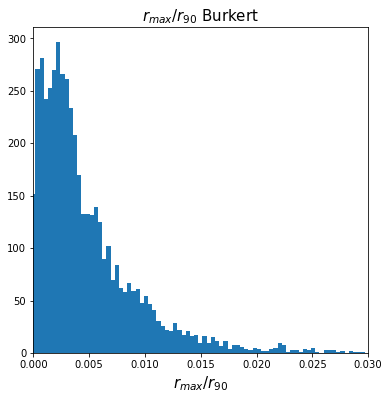

In [50]:
fig = plt.figure(figsize=(6,6))
plt.hist(bur_data_rat,bins=500)
plt.xlim(0,0.03)
plt.xlabel(r'$r_{max}/r_{90}$',fontsize=15)
plt.title(r'$r_{max}/r_{90}$ Burkert',fontsize=15)